In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml


In [2]:
data = fetch_openml('mnist_784', version = 1)

In [3]:
data

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
x = data['data']


In [23]:
y_4 = (data['target'] == '4')

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train,y_test = train_test_split(x,y_4, random_state=42)

In [30]:
import matplotlib.pyplot as plt

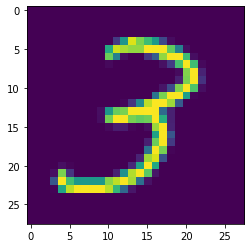

In [31]:
plt.imshow(np.array(x_train)[0].reshape(28,28))

In [32]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()

In [33]:
sgd_clf.fit(x_train,y_train)

SGDClassifier()

In [34]:
y_pred = sgd_clf.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[15418,   495],
       [   78,  1509]])

In [38]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred, output_dict= True)

{'False': {'precision': 0.9949664429530202,
  'recall': 0.9688933576321247,
  'f1-score': 0.9817568212932599,
  'support': 15913},
 'True': {'precision': 0.7529940119760479,
  'recall': 0.9508506616257089,
  'f1-score': 0.8404344193817878,
  'support': 1587},
 'accuracy': 0.9672571428571428,
 'macro avg': {'precision': 0.8739802274645341,
  'recall': 0.9598720096289168,
  'f1-score': 0.9110956203375238,
  'support': 17500},
 'weighted avg': {'precision': 0.9730230002124228,
  'recall': 0.9672571428571428,
  'f1-score': 0.9689408983313453,
  'support': 17500}}

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9672571428571428

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 100)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
accuracy_score(y_test,y_pred_log)

/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9830285714285715

In [56]:
classification_report(y_test,y_pred_log,output_dict = True)

{'False': {'precision': 0.98965257744889,
  'recall': 0.9917048953685665,
  'f1-score': 0.9906776734988544,
  'support': 15913},
 'True': {'precision': 0.915057915057915,
  'recall': 0.8960302457466919,
  'f1-score': 0.9054441260744985,
  'support': 1587},
 'accuracy': 0.9830285714285715,
 'macro avg': {'precision': 0.9523552462534025,
  'recall': 0.9438675705576292,
  'f1-score': 0.9480608997866764,
  'support': 17500},
 'weighted avg': {'precision': 0.9828879072080628,
  'recall': 0.9830285714285715,
  'f1-score': 0.9829482083695714,
  'support': 17500}}

In [57]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(log_reg,x_train,y_train,cv = 10,method = 'decision_function')

/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

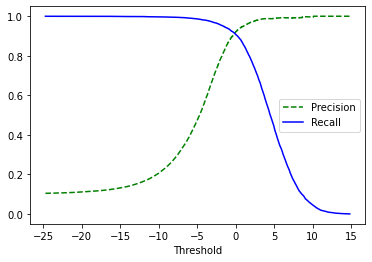

In [60]:
# Precision Recall Tradeoff

from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train,y_scores)
precision, recall, threshold
plt.plot(threshold, precision[:-1],'g--', label = 'Precision')
plt.plot(threshold, recall[:-1], 'b-',label = 'Recall')
plt.legend()
plt.xlabel('Threshold')
plt.show()